# Image filtering and edge detection

Used packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.image as mpimg
from scipy import signal
from scipy import ndimage
import cv2

Method that extracts value channel from input image

In [3]:
def extractValueChannel(image):
    try:
        # Check if it has three channels or not 
        np.size(image, 2)
    except:
        return image
    hsvImage = col.rgb_to_hsv(image)
    return hsvImage[..., 2]

## Load The image

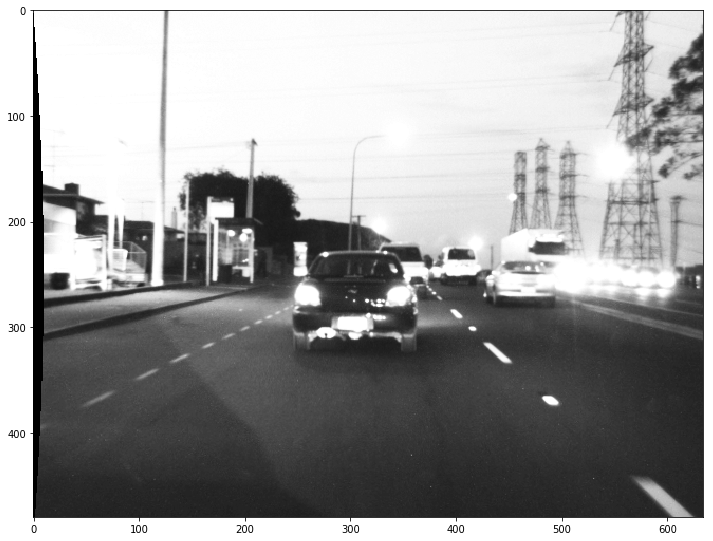

In [4]:
image = mpimg.imread("images/MainRoad.bmp")
valueChannel = extractValueChannel(image)
figureSize = (12,10)
plt.figure("Original Image", figsize=figureSize)
plt.imshow(valueChannel)
plt.set_cmap("gray")

## Adding Noise to the Image 
Changing weight will change the noise in the image

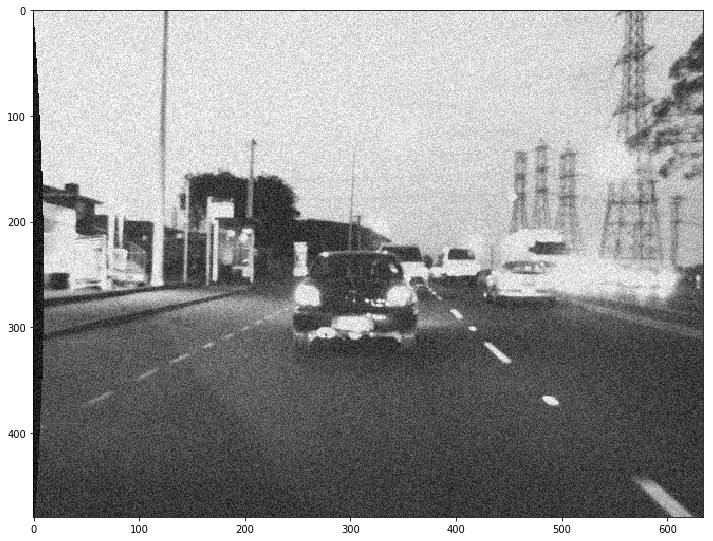

In [5]:
wieght = 0.8
noisy = valueChannel + wieght * valueChannel.std() * np.random.random(valueChannel.shape)
plt.figure("Noisy Image", figsize=figureSize)
plt.imshow(noisy)
plt.set_cmap("gray")

## Image Denoising 


 **Average Filter** 

w represent the width of the average filter


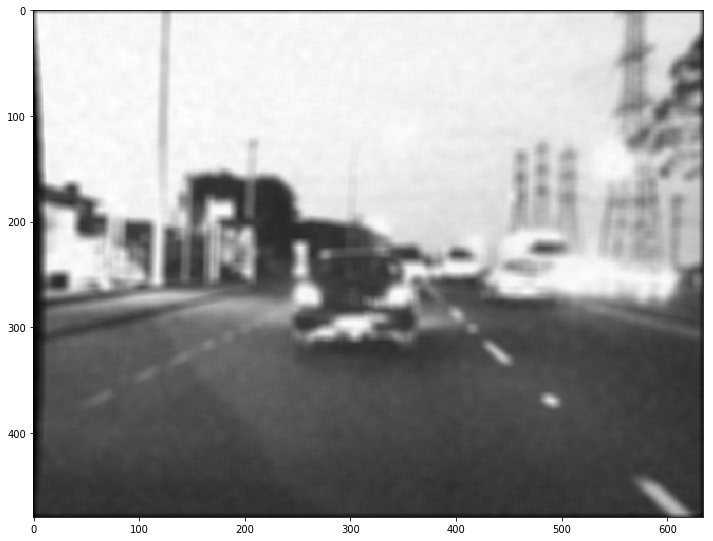

In [6]:
w = 9
boxFilter = np.ones((w,w)) /(w*w)
ImBox = signal.convolve2d(noisy, boxFilter,'same')
plt.figure("Smoothing Box",figsize=figureSize)
plt.imshow(ImBox)

 **Gaussian Filter** 

sigma is the standard devaition 

It is more better than average filter.

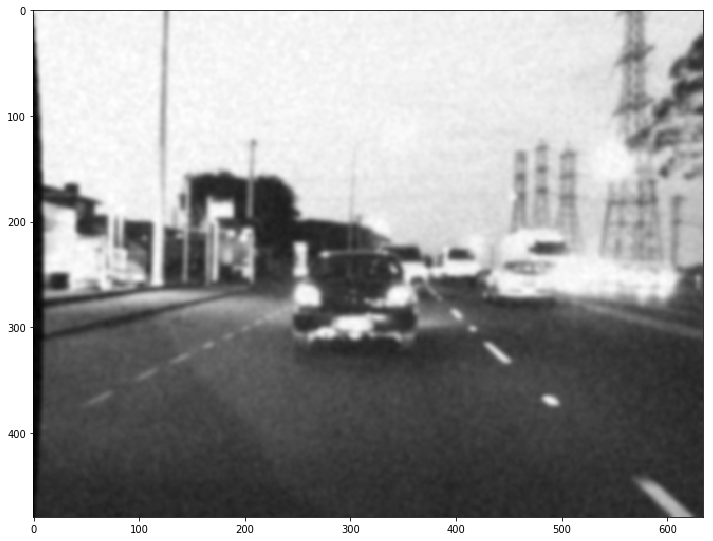

In [7]:
sigma = 2
gaussImage = ndimage.gaussian_filter(noisy, sigma)
plt.figure("Smoothing Gauss",figsize=figureSize)
plt.imshow(gaussImage)

**Median Filter**

s is the parameter that identify the size of the mask

Lets try different values :)

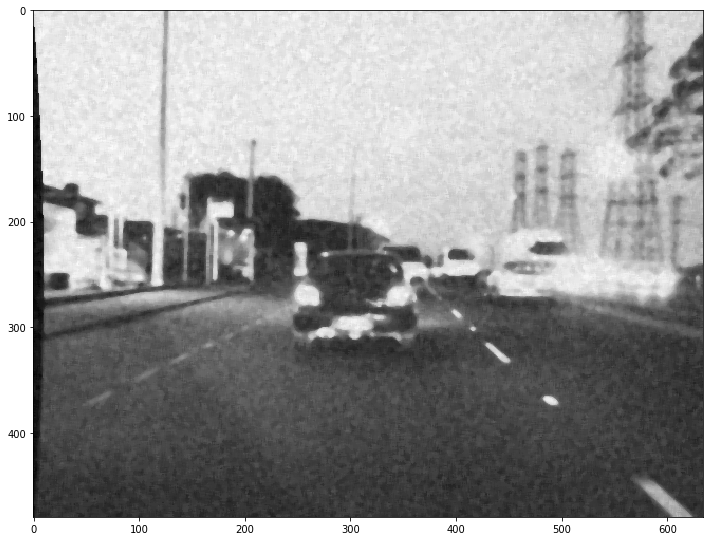

In [8]:
s = 5
medImage = ndimage.median_filter(noisy,(s,s))
plt.figure("Median Filter", figsize=figureSize)
plt.imshow(medImage)

## Edge Detection

Lets try sobel operator

In [9]:
Sobely = np.array([[-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]])
    
Sobelx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

**Load Another Image**

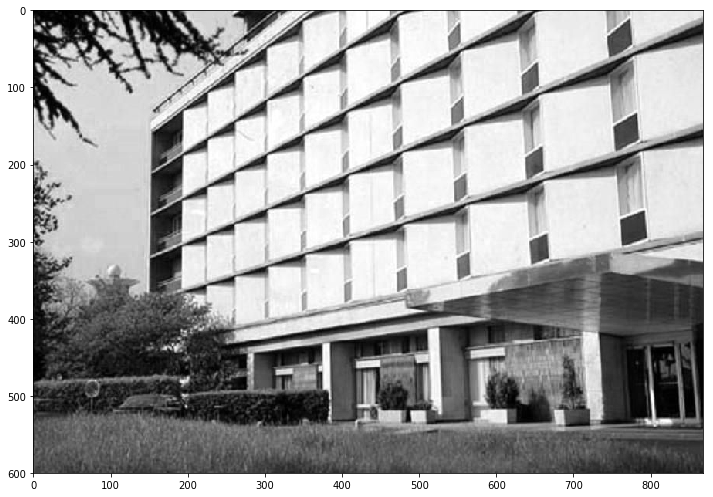

In [10]:
lines = mpimg.imread("images/Lines.jpg")
linesVChannel = extractValueChannel(lines)
plt.figure("Original Image", figsize=figureSize)
plt.imshow(linesVChannel)
plt.set_cmap("gray")

**Sobel in x Direction**

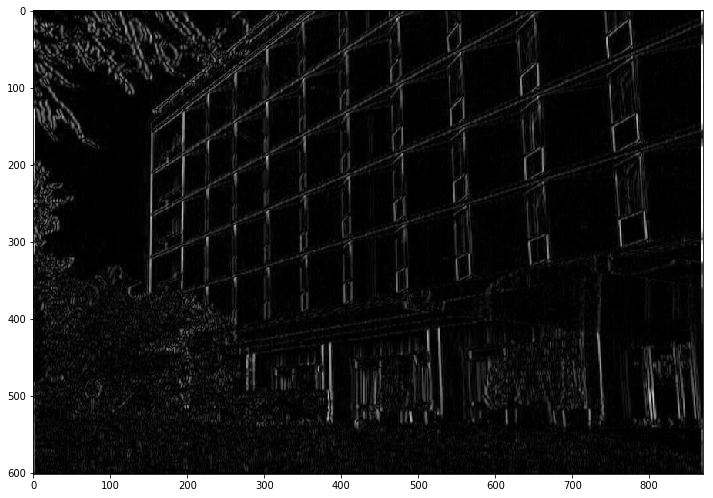

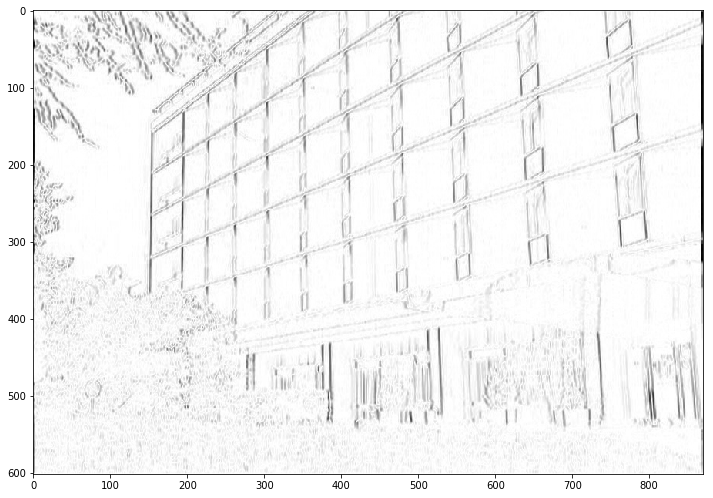

In [15]:
Ix = signal.convolve2d(linesVChannel, Sobelx)
plt.figure("Sobel in x direction", figsize=figureSize)
plt.imshow(np.abs(Ix))
plt.set_cmap("gray")
# We can invert the image 
plt.figure("Sobel in x direction (inverted)", figsize=figureSize)
plt.imshow(255-np.abs(Ix))
plt.set_cmap("gray")

**Sobel in y Direction**

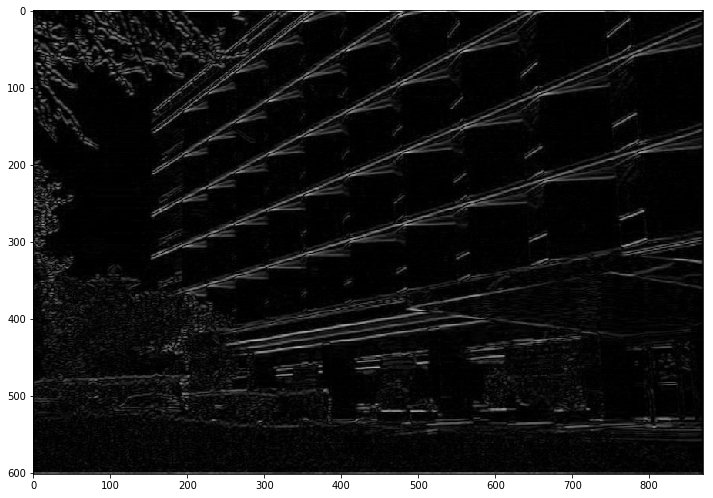

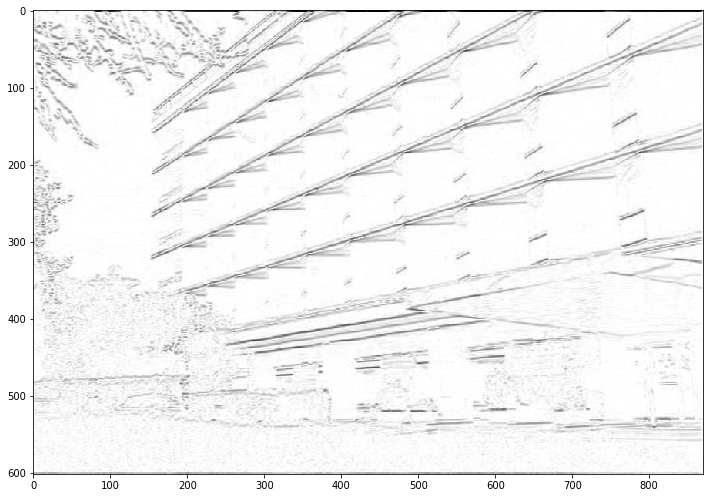

In [16]:
Iy = signal.convolve2d(linesVChannel, Sobely)
plt.figure("Sobel in y direction", figsize=figureSize)
plt.imshow(np.abs(Iy))
plt.set_cmap("gray")
# We can invert the image 
plt.figure("Sobel in y direction (inverted)", figsize=figureSize)
plt.imshow(255-np.abs(Iy))
plt.set_cmap("gray")

## Gradient Magnitude

$$G = \sqrt{Ix^2 + Iy^2}$$


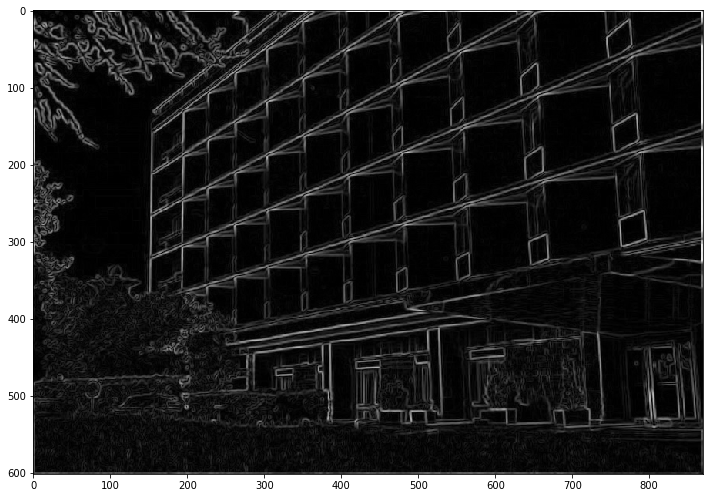

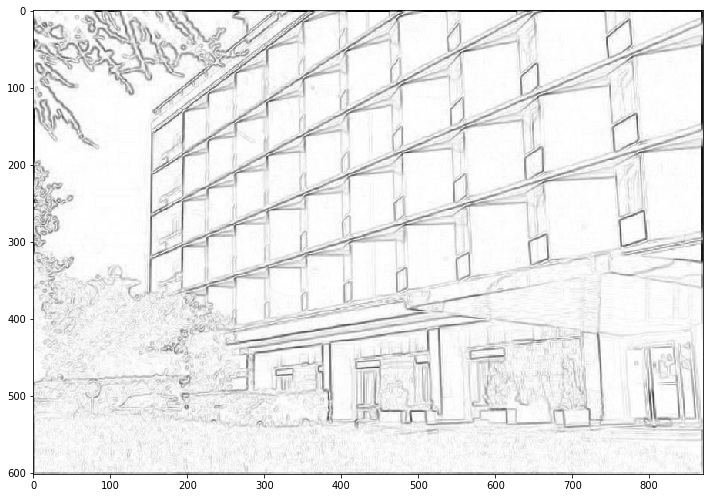

In [17]:
G = np.sqrt(Ix**2 + Iy**2)
plt.figure("Sobel Filter", figsize=figureSize)
plt.imshow(G)
# We can invert the image 
plt.figure("Sobel Filter (inverted)", figsize=figureSize)
plt.imshow(255-G)

## Built in Canny edge detector

Canny is supported by opencv library 

But you have to implement it yourself :)

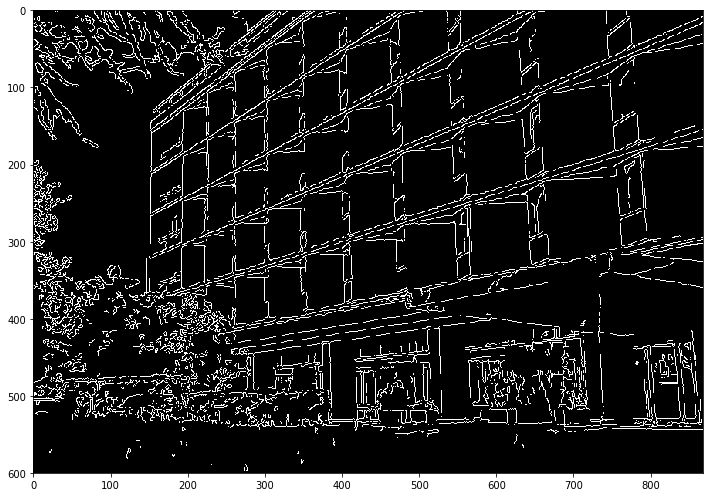

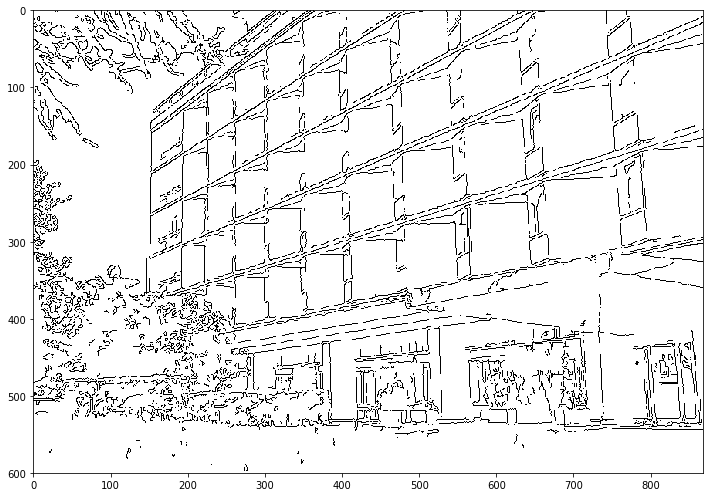

In [18]:
cannyImage = cv2.Canny(np.uint8(linesVChannel),100,200);
plt.figure("Canny Image", figsize=figureSize)
plt.imshow(cannyImage)

## inverted 
plt.figure("Canny Image (inverted)", figsize=figureSize)
plt.imshow(255-cannyImage)